# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "starter_code/Data/citiesCSV.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# OpenWeatherMap API Key
api_key = api_keys.api_key

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | spirit river
Processing Record 5 of Set 1 | vestmannaeyjar
Processing Record 6 of Set 1 | ginda
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | sabha
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | qinhuangdao
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ayr
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | hualmay
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | sal rei
Processing Record 22 of Set 1 | kaitangata
Processing Record 23 o

City not found. Skipping...
Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | pitimbu
Processing Record 42 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 4 | launceston
Processing Record 44 of Set 4 | flin flon
Processing Record 45 of Set 4 | kamaishi
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | morant bay
Processing Record 48 of Set 4 | kargasok
Processing Record 49 of Set 4 | oyama
Processing Record 0 of Set 5 | tiksi
Processing Record 1 of Set 5 | inirida
Processing Record 2 of Set 5 | maraa
Processing Record 3 of Set 5 | manavgat
Processing Record 4 of Set 5 | taltal
Processing Record 5 of Set 5 | west bay
Processing Record 6 of Set 5 | belmonte
Processing Record 7 of Set 5 | manokwari
Processing Record 8 of Set 5 | demyanovo
Processing Record 9 of Set 5 | barberton
Processing Record 10 of Set 5 | tuatapere
Processing Record 11 of Set 5 | vila velha
Processing R

Processing Record 25 of Set 8 | deputatskiy
Processing Record 26 of Set 8 | cherskiy
Processing Record 27 of Set 8 | schleiden
Processing Record 28 of Set 8 | sioux lookout
Processing Record 29 of Set 8 | baixa grande
Processing Record 30 of Set 8 | darnah
Processing Record 31 of Set 8 | okha
Processing Record 32 of Set 8 | banjar
Processing Record 33 of Set 8 | ostroleka
Processing Record 34 of Set 8 | gurupi
Processing Record 35 of Set 8 | aksu
Processing Record 36 of Set 8 | faya
Processing Record 37 of Set 8 | shelburne
Processing Record 38 of Set 8 | antofagasta
Processing Record 39 of Set 8 | vila franca do campo
Processing Record 40 of Set 8 | kasongo-lunda
Processing Record 41 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 8 | west wendover
Processing Record 43 of Set 8 | salta
Processing Record 44 of Set 8 | sampit
Processing Record 45 of Set 8 | ankang
Processing Record 46 of Set 8 | birjand
Processing Record 47 of Set 8 | skibbereen
Processing Rec

Processing Record 11 of Set 12 | labuhan
Processing Record 12 of Set 12 | waddan
Processing Record 13 of Set 12 | sangin
Processing Record 14 of Set 12 | bria
Processing Record 15 of Set 12 | micheweni
Processing Record 16 of Set 12 | banda aceh
Processing Record 17 of Set 12 | padang
Processing Record 18 of Set 12 | eldorado
Processing Record 19 of Set 12 | zhigansk
Processing Record 20 of Set 12 | jever
Processing Record 21 of Set 12 | pontes e lacerda
Processing Record 22 of Set 12 | maine-soroa
Processing Record 23 of Set 12 | batagay
Processing Record 24 of Set 12 | longyan
Processing Record 25 of Set 12 | svetlogorsk
Processing Record 26 of Set 12 | grand gaube
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | lianran
Processing Record 29 of Set 12 | bela
Processing Record 30 of Set 12 | abbeville
Processing Record 31 of Set 12 | lalupon
Processing Record 32 of Set 12 | pandamatenga
Processing Record 33 of Set 12 | netivot
Processing Record 34 of Set 12 | n

In [6]:
api_key

'ee204af552ba0e7322e056c205a9c9b9'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_data_DF = pd.DataFrame(city_data)

lat = city_data_DF["Lat"]
maxTemps = city_data_DF["Max Temp"]
humidity = city_data_DF["Humidity"]
cloudiness = city_data_DF["Cloudiness"]
windSpeed = city_data_DF["Wind Speed"]

city_data_DF.to_csv(output_data_file, index_label="City_ID")

city_data_DF.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,20,ZA,1554437464,76,-33.93,18.42,60.01,10.29
1,mataura,80,NZ,1554437406,62,-46.19,168.86,52.00,6.17
2,atuona,68,PF,1554437708,98,-9.80,-139.03,82.94,15.01
3,spirit river,90,CA,1554438132,79,55.78,-118.84,28.40,8.05
4,vestmannaeyjar,88,IS,1554437700,96,63.44,-20.27,36.23,3.83


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

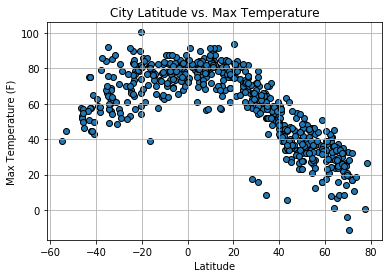

In [15]:
plt.scatter(lat, maxTemps,
            edgecolor="black", linewidths=1, label="Cities")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("starter_code/Data/Fig1.png")


#### Latitude vs. Humidity Plot

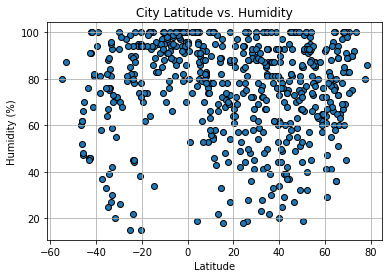

In [17]:
plt.scatter(lat, humidity,
            edgecolor="black", linewidths=1, label="Cities")

plt.title("City Latitude vs. Humidity"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("starter_code/Data/Fig2.png")

#### Latitude vs. Cloudiness Plot

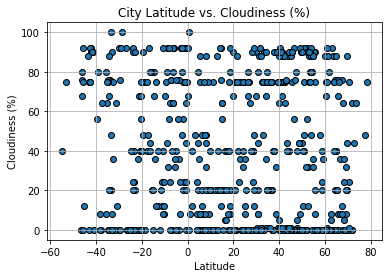

In [23]:
plt.scatter(lat, cloudiness,
            edgecolor="black", linewidths=1, label="Cities")

plt.title("City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("starter_code/Data/Fig3.png")

#### Latitude vs. Wind Speed Plot

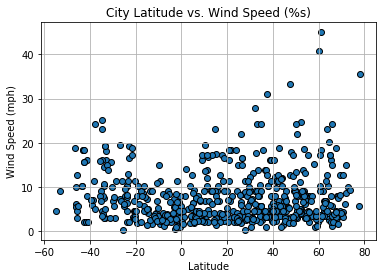

In [24]:
plt.scatter(lat, windSpeed,
            edgecolor="black", linewidths=1, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("starter_code/Data/Fig4.png")
